In [560]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score

In [561]:
df = pd.read_csv("hotel_bookings.csv")
df.shape

(119390, 32)

In [562]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [563]:
df = df.drop(columns=["reservation_status", "reservation_status_date", "arrival_date_year", "arrival_date_month", 
                       "arrival_date_week_number", "arrival_date_day_of_month", "company", "agent", "assigned_room_type"])
 

In [564]:
df.iloc[0]

hotel                             Resort Hotel
is_canceled                                  0
lead_time                                  342
stays_in_weekend_nights                      0
stays_in_week_nights                         0
adults                                       2
children                                   0.0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                          Direct
distribution_channel                    Direct
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           C
booking_changes                              3
deposit_type                        No Deposit
days_in_waiting_list                         0
customer_type                        Transient
adr                                        0.0
required_car_

In [506]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
dtype: int64

In [507]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [508]:
df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [509]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [510]:
df['country'].mode()

0    PRT
Name: country, dtype: object

In [511]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [512]:
df['country'].isnull().sum()

0

In [513]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [514]:
df['children'].median()

0.0

In [515]:
df['children'] = df['children'].fillna(df['children'].median())
df.isnull().sum().sum()

0

In [516]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

<Axes: ylabel='lead_time'>

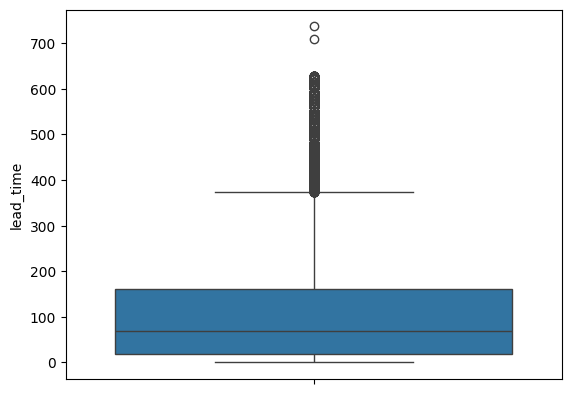

In [517]:
sns.boxplot(df['lead_time'])

In [518]:
q1 = df['lead_time'].quantile(0.25)
q3 = df['lead_time'].quantile(0.75)
print("q1", q1)
print("q3", q3)

iqr = q3 - q1
print("iqr", iqr)

upper_limit = q3 + 1.5 * iqr
print("upper limit : ",upper_limit)

lower_limit = q1 - 1.5 * iqr
print("lower limit : ",lower_limit)

df = df[(df['lead_time']>= lower_limit) & (df['lead_time'] <= upper_limit)]

q1 18.0
q3 160.0
iqr 142.0
upper limit :  373.0
lower limit :  -195.0


<Axes: ylabel='lead_time'>

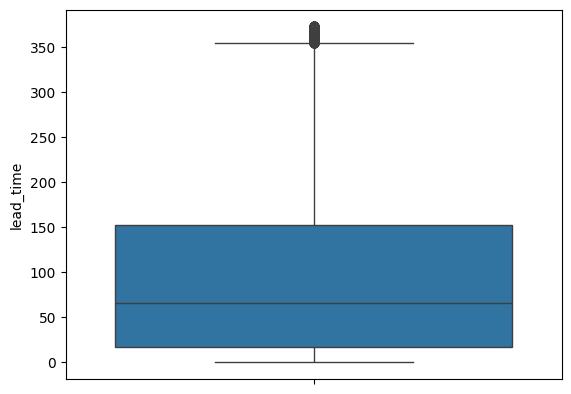

In [519]:
sns.boxplot(df['lead_time'])

<Axes: ylabel='adr'>

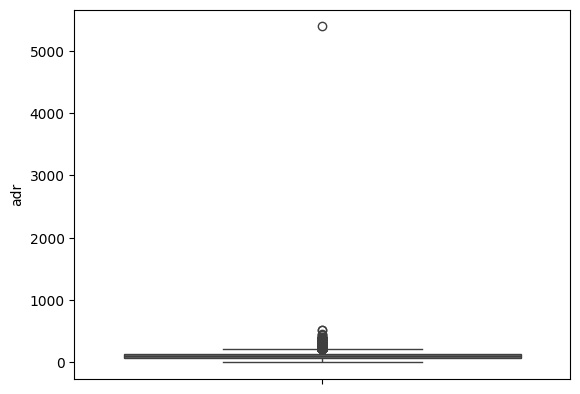

In [520]:
sns.boxplot(df['adr'])

In [521]:
q1 = df['adr'].quantile(0.25)
q3 = df['adr'].quantile(0.75)
print("q1", q1)
print("q3", q3)

iqr = q3 - q1
print("iqr", iqr)

upper_limit = q3 + 1.5 * iqr
print("upper limit : ",upper_limit)

lower_limit = q1 - 1.5 * iqr
print("lower limit : ",lower_limit)

df = df[(df['adr']>= lower_limit) & (df['adr'] <= upper_limit)]

q1 70.0
q3 126.6
iqr 56.599999999999994
upper limit :  211.5
lower limit :  -14.899999999999991


<Axes: ylabel='adr'>

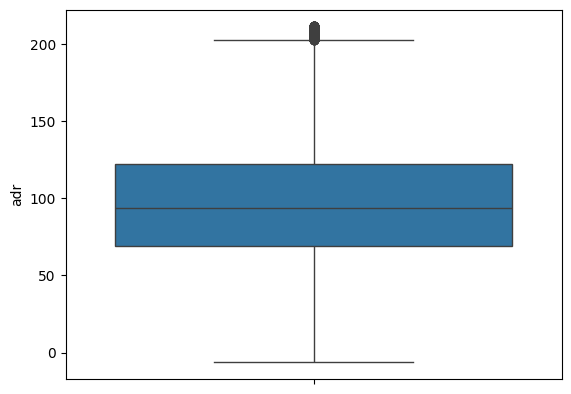

In [522]:
sns.boxplot(df['adr'])

In [523]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [524]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type'],
      dtype='object')

In [525]:
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [526]:
df.head(10)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,0,0,2,0.0,0,0,133,...,0,0,2,3,0,0,2,0.0,0,0
2,1,0,7,0,1,1,0.0,0,0,57,...,0,0,0,0,0,0,2,75.0,0,0
3,1,0,13,0,1,1,0.0,0,0,57,...,0,0,0,0,0,0,2,75.0,0,0
4,1,0,14,0,2,2,0.0,0,0,57,...,0,0,0,0,0,0,2,98.0,0,1
5,1,0,14,0,2,2,0.0,0,0,57,...,0,0,0,0,0,0,2,98.0,0,1
6,1,0,0,0,2,2,0.0,0,0,133,...,0,0,2,0,0,0,2,107.0,0,0
7,1,0,9,0,2,2,0.0,0,1,133,...,0,0,2,0,0,0,2,103.0,0,1
8,1,1,85,0,3,2,0.0,0,0,133,...,0,0,0,0,0,0,2,82.0,0,1
9,1,1,75,0,3,2,0.0,0,2,133,...,0,0,3,0,0,0,2,105.5,0,0
10,1,1,23,0,4,2,0.0,0,0,133,...,0,0,4,0,0,0,2,123.0,0,0


<Axes: ylabel='stays_in_week_nights'>

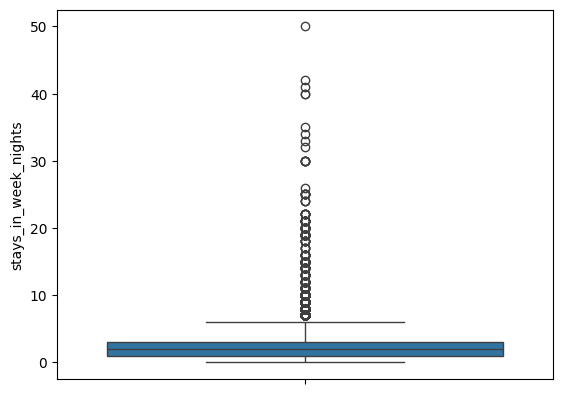

In [527]:
sns.boxplot(df['stays_in_week_nights'])

In [528]:
q1 = df['stays_in_week_nights'].quantile(0.25)
q3 = df['stays_in_week_nights'].quantile(0.75)
print("q1", q1)
print("q3", q3)

iqr = q3 - q1
print("iqr", iqr)

upper_limit = q3 + 1.5 * iqr
print("upper limit : ",upper_limit)

lower_limit = q1 - 1.5 * iqr
print("lower limit : ",lower_limit)

df = df[(df['stays_in_week_nights']>= lower_limit) & (df['stays_in_week_nights'] <= upper_limit)]

q1 1.0
q3 3.0
iqr 2.0
upper limit :  6.0
lower limit :  -2.0


<Axes: ylabel='stays_in_week_nights'>

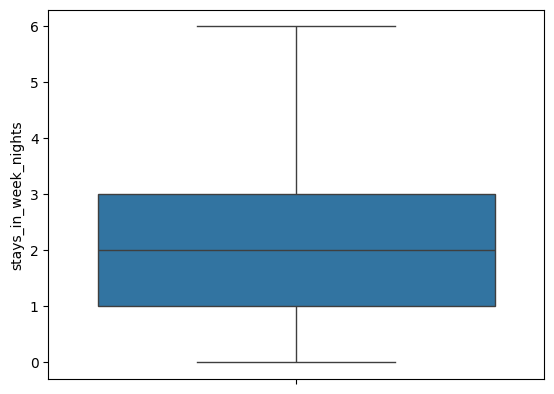

In [529]:
sns.boxplot(df['stays_in_week_nights'])

In [530]:
# df.info()

In [531]:
x = df.drop('is_canceled', axis = 1)
y = df['is_canceled']

In [532]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [533]:
x_train.shape, x_test.shape

((87557, 22), (21890, 22))

In [534]:
y_train.shape, y_test.shape

((87557,), (21890,))

In [535]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.67982271,  1.0509188 , -0.9817793 , ...,  0.42935513,
        -0.25310702,  0.54966716],
       [ 1.47097176, -0.50140863,  1.31853648, ..., -1.24226869,
        -0.25310702, -0.71880778],
       [ 1.47097176, -0.98651096, -0.9817793 , ..., -2.39426752,
        -0.25310702, -0.71880778],
       ...,
       [-0.67982271,  0.23163488, -0.9817793 , ...,  0.69406975,
        -0.25310702, -0.71880778],
       [ 1.47097176, -0.43672832,  1.31853648, ...,  2.6304082 ,
        -0.25310702,  0.54966716],
       [ 1.47097176, -1.01885111,  0.16837859, ..., -1.36482176,
        -0.25310702, -0.71880778]])

In [536]:
x_test = scaler.transform(x_test)
x_test

array([[ 1.47097176,  1.77318226, -0.9817793 , ..., -1.41261746,
        -0.25310702, -0.71880778],
       [-0.67982271,  0.46879601,  0.16837859, ...,  0.93672482,
        -0.25310702, -0.71880778],
       [-0.67982271,  2.76494701,  1.31853648, ..., -0.92363072,
        -0.25310702, -0.71880778],
       ...,
       [-0.67982271, -0.31814776,  0.16837859, ...,  0.98084393,
        -0.25310702,  1.81814211],
       [ 1.47097176,  0.95389833,  0.16837859, ...,  0.0764023 ,
        -0.25310702,  1.81814211],
       [-0.67982271, -0.79247003,  0.16837859, ...,  1.01760985,
        -0.25310702,  1.81814211]])

In [537]:
classifier = LogisticRegression()

In [538]:
classifier.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [539]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [540]:
accuracy_score(y_test, y_pred)

0.7871630881681133

In [541]:
dtc = tree.DecisionTreeClassifier(criterion='entropy')

In [542]:
dtc.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [543]:
y_train_pred = classifier.predict(x_train)
y_train_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [544]:
accuracy_score(y_train, y_train_pred)

0.7914729833137271

In [545]:
y_pred_dtc = dtc.predict(x_test)
y_pred_dtc

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [546]:
accuracy_score(y_test, y_pred_dtc)

0.8353586112380083

In [547]:
dt_gini = tree.DecisionTreeClassifier(criterion="gini")
dt_gini.fit(x_train, y_train)
y_pred_gini = dt_gini.predict(x_test)
accuracy_score(y_test,y_pred_gini)

0.8306989492919141

In [548]:
df.loc[0].values

array([  1.,   0., 342.,   0.,   0.,   2.,   0.,   0.,   0., 133.,   3.,
         1.,   0.,   0.,   0.,   2.,   3.,   0.,   0.,   2.,   0.,   0.,
         0.])

In [549]:
dtc.predict([[ 1.,   0., 342.,   0.,   0.,   2.,   0.,   0.,   0., 133.,   3.,
         1.,   0.,   0.,   0.,   2.,   3.,   0.,   0.,   2.,   0.,   0.]])

array([1], dtype=int64)

In [550]:
df.head(10)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,0,0,2,0.0,0,0,133,...,0,0,2,3,0,0,2,0.0,0,0
2,1,0,7,0,1,1,0.0,0,0,57,...,0,0,0,0,0,0,2,75.0,0,0
3,1,0,13,0,1,1,0.0,0,0,57,...,0,0,0,0,0,0,2,75.0,0,0
4,1,0,14,0,2,2,0.0,0,0,57,...,0,0,0,0,0,0,2,98.0,0,1
5,1,0,14,0,2,2,0.0,0,0,57,...,0,0,0,0,0,0,2,98.0,0,1
6,1,0,0,0,2,2,0.0,0,0,133,...,0,0,2,0,0,0,2,107.0,0,0
7,1,0,9,0,2,2,0.0,0,1,133,...,0,0,2,0,0,0,2,103.0,0,1
8,1,1,85,0,3,2,0.0,0,0,133,...,0,0,0,0,0,0,2,82.0,0,1
9,1,1,75,0,3,2,0.0,0,2,133,...,0,0,3,0,0,0,2,105.5,0,0
10,1,1,23,0,4,2,0.0,0,0,133,...,0,0,4,0,0,0,2,123.0,0,0


In [551]:
arr = round(df.iloc[8]).values
arr

array([  1.,   1.,  75.,   0.,   3.,   2.,   0.,   0.,   2., 133.,   5.,
         3.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   2., 106.,   0.,
         0.])

In [552]:
for x in arr:
    print(f"{x:.1f}", end=", ")

1.0, 1.0, 75.0, 0.0, 3.0, 2.0, 0.0, 0.0, 2.0, 133.0, 5.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 106.0, 0.0, 0.0, 

In [553]:
dtc.predict([[1.0, 1.0, 75.0, 0.0, 3.0, 2.0, 0.0, 0.0, 2.0, 133.0, 5.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 106.0, 0.0]])

array([0], dtype=int64)

In [554]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [555]:
pred_data = pd.DataFrame([[1.0, 1.0, 75.0, 0.0, 3.0, 2.0, 0.0, 0.0, 2.0, 133.0, 5.0, 3.0, 0.0,
                            0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 106.0, 0.0]],
                         columns = ['hotel', 'lead_time', 'stays_in_weekend_nights',
                                    'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
                                    'country', 'market_segment', 'distribution_channel',
                                    'is_repeated_guest', 'previous_cancellations',
                                    'previous_bookings_not_canceled', 'reserved_room_type',
                                    'booking_changes', 'deposit_type', 'days_in_waiting_list',
                                    'customer_type', 'adr', 'required_car_parking_spaces',
                                    'total_of_special_requests'])
pred_data

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1.0,1.0,75.0,0.0,3.0,2.0,0.0,0.0,2.0,133.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,106.0,0.0


In [556]:
scaled = scaler.transform(pred_data)
scaled

array([[ 1.47097176e+00, -1.00807106e+00,  8.52800625e+01,
        -1.61308837e+00,  2.00992716e+00,  5.42770117e+00,
        -7.80904176e-02, -5.10220900e-01, -2.01029221e+00,
         1.00025949e+02,  2.63709175e+00,  1.64231731e+01,
        -1.06053854e-01, -9.33671396e-02, -5.59305258e-01,
         4.44035227e+00, -3.62732423e-01, -1.46029212e-01,
        -3.79187932e+00, -2.34524629e+00,  4.32760150e+02,
        -7.18807782e-01]])

In [557]:
pred = dtc.predict(pred_data)
pred

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0], dtype=int64)

In [558]:
import pickle as pk

In [559]:
pk.dump(classifier, open("classifier.pkl",'wb'))
pk.dump(scaler, open("scaler.pkl",'wb'))
pk.dump(encoders, open("encoders.pkl","wb"))